# KINTU DECLAN TREVOR - 100944330

# AIDI 2001 - PROFESSOR UZAIR AHMAD

# ASSIGNMENT-2: GENETIC MUTATION

1) Import Libraries

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

2) Define the Fitness Function

In [11]:
def fitness_function(individual):
    # Convert the individual's chromosome to a NumPy array
    individual_array = np.array(individual)
    # Generate a random weight matrix of the same length as the chromosome
    weight_matrix = np.random.rand(len(individual))
    # Calculate the dot product of the individual's chromosome and the weight matrix
    fitness_value = np.dot(individual_array, weight_matrix)
    return fitness_value

3) Define Mutation Operation

In [12]:
def mutate(individual, mutation_rate):
    # Mutate individual based on mutation_rate
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip the bit
    return individual

4) Define the Crossover Operation

In [13]:
def cross_over(parent1, parent2):
    # Perform single-point crossover
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

5) Select parents for reproduction using Roulette wheel selection

In [14]:
def roulette_wheel(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    roulette_value = random.uniform(0, total_fitness)
    cumulative_fitness = 0
    for i, fitness in enumerate(fitness_scores):
        cumulative_fitness += fitness
        if cumulative_fitness >= roulette_value:
            return population[i]

6) Generate next generation

In [15]:
def next_gen(population, mutation_rate):
    next_generation = []
    fitness_scores = [fitness_function(individual) for individual in population]
    for _ in range(len(population)):
        parent1 = roulette_wheel(population, fitness_scores)
        parent2 = roulette_wheel(population, fitness_scores)
        child1, child2 = cross_over(parent1, parent2)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        next_generation.extend([child1, child2])
    return next_generation

7) Main genetic Algorithm Function

In [16]:
def genetic_algorithm(population_size, chromosome_length, mutation_rate, generations):
    # Initialize population
    population = [[random.randint(0, 1) for _ in range(chromosome_length)] for _ in range(population_size)]
    best_fitness_history = []

    # Evolution loop
    for _ in range(generations):
        # Generate next generation
        population = next_gen(population, mutation_rate)
        # Record best fitness
        best_fitness = max([fitness_function(individual) for individual in population])
        best_fitness_history.append(best_fitness)

    return population, best_fitness_history

8) Function to visualize the evolution

In [17]:
def plot_evolution(best_fitness_history):
    plt.plot(best_fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness')
    plt.show()

9) User Inputs

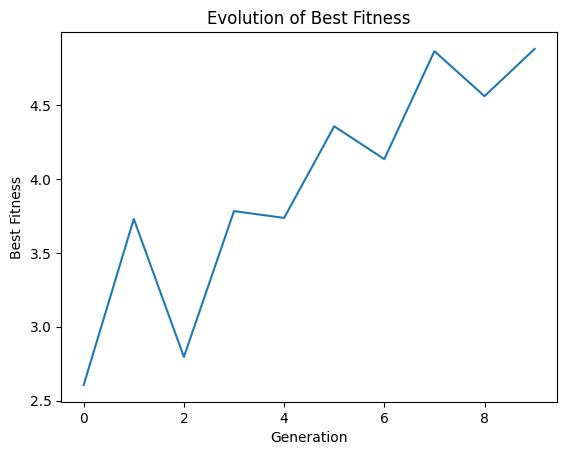

In [18]:
# User inputs
population_size = int(input("Input a population size: "))
chromosome_length = int(input("Input a chromosome length: "))
mutation_rate = float(input("Input a mutation rate: "))
generations = 10

if population_size > 10: 
    print("Please enter a maximum of 10 for the Population Size for optimum performance.")
else:
    # Execute Genetic Algorithm
    final_population, best_fitness_history = genetic_algorithm(population_size, chromosome_length, 
                                                            mutation_rate, generations)

    # Plot evolution
    plot_evolution(best_fitness_history)